**Name:** Dang Quynh Tram Nguyen

**Matrikelnummer:** 5311561

**Semester:** Wintersemester 23/24

**Modul:** Data Science


# Lesen Fasta Dateien

Die Daten der DNA-Fragmente der K562-Zelle, die als Enhancern und Promotoren bezeichnet sind, wurden von UCSC-Webseite heruntergeladen.

Promotoren sind Bestandteile von Genen und spielen eine entscheidende Rolle bei der Genregulation.  Transkriptionsfaktoren sowie RNA-Polymerase binden an sie, um die Transkription der Gene zu initiieren. Enhancer sind spezifische DNA-Abschnitte, an die Transkriptionsfaktoren binden können. Sie optimieren die Transkriptionsaktivität der Gene, deren Promotoren mit ihnen gekoppelt sind.

In [1]:
from Bio import SeqIO
    
# Funktion: Lesen Text-Dateien (Format ähnlich wie eine FASTA-Datei) und geben eine Liste der Sequenzen zurück
def read_fasta(*paths):
    sequences = {'seq': []}
    for path in paths:
        with open (path, 'r') as fasta_file:
            for record in SeqIO.parse(fasta_file, 'fasta'):
                sequences['seq'].append(record.seq)
    return sequences

Die Anzahl der Enhancern nach dem Filtern ist ganz wenig. Deswegen wurden 3 Dateien mit insgesamt ca. 2000 Sequenzen gelesen. Die Datei von Promotoren enthält ca. 600 Sequenzen.

In [2]:
enhancers = read_fasta('Enhancer.txt', 'Enhancer2.txt', 'Enhancer3.txt')
promotors = read_fasta('Promotor.txt')

In [3]:
import pandas as pd

# Erstellen die Data Frames für die Sequenzendaten von Enhancers und Promotoren
df_enhancers = pd.DataFrame(enhancers)
df_promotors = pd.DataFrame(promotors)

In [4]:
df_enhancers

,seq
0,"(C, C, G, C, C, G, T, T, G, C, A, A, A, G, G, ..."
1,"(G, A, T, T, C, A, T, G, G, C, T, G, A, A, A, ..."
2,"(G, A, T, T, C, A, T, G, G, C, T, G, A, A, A, ..."
3,"(G, A, T, T, C, A, T, G, G, C, T, G, A, A, A, ..."
4,"(G, A, T, C, C, T, T, G, A, A, G, C, G, C, C, ..."
...,...
2108,"(G, A, T, C, C, A, C, C, C, A, C, C, T, T, G, ..."
2109,"(G, A, T, C, C, A, C, C, C, A, C, C, T, T, G, ..."
2110,"(G, A, T, C, C, A, C, C, C, A, C, C, T, T, G, ..."
2111,"(G, A, T, C, C, A, C, C, C, A, C, C, T, T, G, ..."


In [5]:
# Die Größen der Enhancern- und Promotoren-Daten
print(len(df_enhancers))
print(len(df_promotors))

2113
611


In [6]:
# Sortieren die Duplikationen in den Daten aus
df_enhancers = df_enhancers.drop_duplicates(ignore_index=True)
df_promotors = df_promotors.drop_duplicates(ignore_index=True)

# Die Größen der Daten nach dem Aussortieren der Duplikationen
print(len(df_enhancers))
print(len(df_promotors))

227
385


In [7]:
# Finden die überlappten Sequenzen von Enhancers und Promotoren
overlap_seq = df_enhancers[df_enhancers['seq'].isin(df_promotors['seq'])]
len(overlap_seq)

111

In [8]:
# Funktion: Sortieren die überlappten Sequenzen in beiden Daten aus 
def df_without_overlap(df: pd.DataFrame):
    global overlap_seq
    # Mergen die Datenframe mit überlappten Sequenzen
    merged_df = pd.merge(df, overlap_seq, on='seq', how='outer', indicator=True)
    
    # Sortieren die Überlappten aus
    filtered_df = merged_df[merged_df['_merge'] == 'left_only'].drop(columns='_merge')
    
    return filtered_df

In [9]:
df_enhancers = df_without_overlap(df_enhancers)
df_promotors = df_without_overlap(df_promotors)

In [10]:
# Die Größen der Daten nach dem Aussortieren der überlappten Sequenzen
print(len(df_enhancers))
print(len(df_promotors))

116
274


# Hypothesentest: Unterschied zwischen GC-Anteil in Enhancern und Promotoren

Der GC-Anteil ist ein charakteristisches Merkmal von Nukleinsäuremolekülen und gibt den Gehalt an Guanin (G) und Cytosin (C) im Verhältnis zu den gesamten Nukleobasen in einer Sequenz an. In diesem Abschnitt wurden die GC-Anteile der Enhancer und Promotoren berechnet und miteinander verglichen, um festzustellen, ob signifikante Unterschiede vorhanden sind.


## Vorbereiten der GC-Anteilen

In [11]:
# Funktion: Berechnung die GC-Anteil in jeder Sequenzen
# Formel: Summe der Anzahl von C und G über Summe aller Nukleotiden in der Sequenz
def add_gc_amount_col(df: pd.DataFrame):    
    df['gc_amount'] = df.apply(lambda row: (row['seq'].count('C') + row['seq'].count('G')) / len(row['seq']), axis = 1)

In [12]:
add_gc_amount_col(df_enhancers)
add_gc_amount_col(df_promotors)

In [13]:
df_enhancers

,seq,gc_amount
0,"(C, C, G, C, C, G, T, T, G, C, A, A, A, G, G, ...",0.429431
1,"(G, A, T, T, C, A, T, G, G, C, T, G, A, A, A, ...",0.391445
2,"(G, A, T, C, C, T, T, G, A, A, G, C, G, C, C, ...",0.428906
14,"(C, T, G, C, C, C, T, T, G, C, T, G, A, C, C, ...",0.564309
15,"(C, A, G, T, C, C, C, A, G, C, G, G, A, C, A, ...",0.572551
...,...,...
202,"(G, C, T, T, C, C, C, A, A, A, C, T, G, C, T, ...",0.504595
209,"(C, A, T, C, A, C, C, A, C, A, A, T, C, A, A, ...",0.444295
213,"(G, A, T, C, C, C, C, A, T, A, T, T, C, C, C, ...",0.511536
217,"(G, A, A, T, T, C, T, T, T, G, T, A, A, T, A, ...",0.415281


## Visualisieren die Verteilung der GC-Anteile bei Enhancers und Promotoren

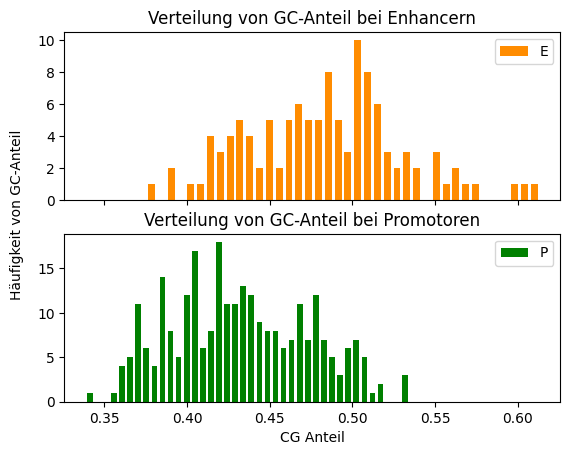

In [14]:
import matplotlib.pyplot as plt

# Erstellen die Plots, da sie die x-Achse (GC-Anteil) miteinander teilen
fig, axs = plt.subplots(2,1, sharex = True)

axs[0].hist(df_enhancers['gc_amount'], bins = 40, rwidth = 0.7, color = 'darkorange')
axs[0].legend('Enhancern')
axs[1].hist(df_promotors['gc_amount'], bins = 40, rwidth = 0.7, color = 'green')
axs[1].legend('Promotoren')

# Setzen die Labels der Achsen
fig.text(0.04, 0.5,'Häufigkeit von GC-Anteil', va='center', rotation = 'vertical')
plt.xlabel('CG Anteil')

# Beschriften der Plots
axs[0].set_title('Verteilung von GC-Anteil bei Enhancern')
axs[1].set_title('Verteilung von GC-Anteil bei Promotoren')

plt.show()

## Testen die Normalveteilung von jeder Stichprobe durch Shapiro Wilk Test

**Stichproben:** Die GC-Anteile der Enhancern und Promotoren

**Nullhypothese:** Normalverteilung

Signifikant Level  = 0.05

In [15]:
from scipy import stats

sig_lv = 0.05

e_stat_sw, e_p_val_sw = stats.shapiro(df_enhancers['gc_amount'])
p_stat_sw, p_p_val_sw = stats.shapiro(df_promotors['gc_amount'])

print('Shapiro-Wilk Test:')
if e_p_val_sw >= sig_lv:
    print(f'Die GC-Anteil bei Enhancern verteilt normal (p-value = {e_p_val_sw})')
else:
    print(f'Die GC-Anteil bei Enhancern verteilt NICHT normal (p-value = {e_p_val_sw})')

if p_p_val_sw >= sig_lv:
    print(f'Die GC-Anteil bei Promotoren verteilt normal (p-value = {p_p_val_sw})')
else:
    print(f'Die GC-Anteil bei Promotoren verteilt NICHT normal (p-value = {p_p_val_sw})')


Shapiro-Wilk Test:
Die GC-Anteil bei Enhancern verteilt normal (p-value = 0.4938776195049286)
Die GC-Anteil bei Promotoren verteilt NICHT normal (p-value = 0.0018061109585687518)


## Testen die Varianzhomogenität von jeder Sitchprobe durch Levene Test

**Stichproben:** Die GC-Anteile der Enhancern und Promotoren

**Nullhypothese:** Varianzhomogenität

Signifikant Level = 0.05

In [16]:
sig_lv = .05

stat_le, p_val_le = stats.levene(df_enhancers['gc_amount'], df_promotors['gc_amount'])

if p_val_le >= sig_lv:
    print(f'2 Stichproben sind varianzhomogen (p-value = {p_val_le})')
else:
    print(f'2 Stichproben sind NICHT varianzhomogen (p-value = {p_val_le})')


2 Stichproben sind varianzhomogen (p-value = 0.35227239234991037)


## Testen die gleiche GC-Anteile zwischen beiden Stichproben

2 unabhängigen Stichproben (GC-Anteile bei Enhancern und Promotoren) sind varianzhomogen, aber nur eine ist normal verteilt

=> Wählen Mann-Whitney-U Test (weder Normalverteilung noch Varianzhomogenität benötigt)

**Nullhypothese:** gleiche GC-Anteile bei Enhancern und Promotoren

Signifikant Level = 0.05

In [17]:
sig_lv = 0.05

stat_man, p_val_man = stats.mannwhitneyu(df_enhancers['gc_amount'], df_promotors['gc_amount'], alternative = 'two-sided')

if p_val_man >= sig_lv:
    print(f'Enhancern und Promotoren haben gleiche Verteilung der GC-Anteil (p-value = {p_val_man})')
else:
    print(f'Die Verteilungen der GC-Anteil der Enhancern und Promotoren sind signifikant (p-value = {p_val_man})')        

Die Verteilungen der GC-Anteil der Enhancern und Promotoren sind signifikant (p-value = 1.8437876883184977e-19)


# Klassifikation: Unterschied zwischen Enhancern Promotoren anhand 2 meren Nukleotiden

In diesem Abschnitt werden die Anteile der Dinukleotide gezählt. Diese dienen als Merkmale, die den Sequenztyp repräsentieren, unabhängig davon, ob es sich um einen Enhancer oder einen Promotor handelt. Die Klassifikation erfolgt mithilfe von Random Forest- und KNN-Modellen. Diese Modelle werden verwendet, um vorherzusagen, ob eine Sequenz als Enhancer oder Promotor klassifiziert werden kann.

## Vorbereiten der Dinukleotiden-Anteile (Anteile der 2-mere-Nukleotiden)

In [18]:
# Erstellen die Liste von allen möglichen 2-meren Nukleotiden 
_2mer = []
nu = ['A', 'T', 'G', 'C']
for i in nu:
    _2mer.extend([i + n for n in nu])
    
_2mer

['AA',
 'AT',
 'AG',
 'AC',
 'TA',
 'TT',
 'TG',
 'TC',
 'GA',
 'GT',
 'GG',
 'GC',
 'CA',
 'CT',
 'CG',
 'CC']

In [19]:
# Funktion: Berechnen die Anteile alle 2-meren Nukleotiden in jeder Sequenzen
# Formel für Anzahl möglichen Nukleotidenpaare in einer Sequenz = n - 2 + 1 (n ist die Anzahl der Nukleotide in dieser Sequenz)
def add_col_for_2mer(df: pd.DataFrame):
    for pair in _2mer:
        df[pair] = df.apply(lambda row: row['seq'].count(pair) / (len(row['seq']) - 2 + 1), axis = 1)

In [20]:
add_col_for_2mer(df_enhancers)
add_col_for_2mer(df_promotors)

In [21]:
# Addieren Klasse-Spalte, um die Daten zu unterscheiden, wenn beide Dataframes verkettet werden
df_enhancers['class'] = 'enhancer'
df_promotors['class'] = 'promotor'

In [22]:
# Verketten beide Dataframes von Enhancern und Promotoren
combine_df_2mer = pd.concat([df_enhancers, df_promotors], ignore_index= True)
combine_df_2mer

,seq,gc_amount,AA,AT,AG,AC,TA,TT,TG,TC,GA,GT,GG,GC,CA,CT,CG,CC,class
0,"(C, C, G, C, C, G, T, T, G, C, A, A, A, G, G, ...",0.429431,0.072356,0.072685,0.073117,0.053051,0.061073,0.059268,0.069934,0.058998,0.060701,0.046259,0.045030,0.047769,0.077080,0.071061,0.011679,0.045593,enhancer
1,"(G, A, T, T, C, A, T, G, G, C, T, G, A, A, A, ...",0.391445,0.078460,0.082852,0.069452,0.053150,0.070495,0.066748,0.072306,0.059577,0.060743,0.049205,0.036252,0.039205,0.074217,0.070346,0.007370,0.037518,enhancer
2,"(G, A, T, C, C, T, T, G, A, A, G, C, G, C, C, ...",0.428906,0.073188,0.074309,0.072103,0.058585,0.060261,0.055277,0.068589,0.058925,0.062242,0.046859,0.044133,0.044573,0.082494,0.066608,0.012981,0.044869,enhancer
3,"(C, T, G, C, C, C, T, T, G, C, T, G, A, C, C, ...",0.564309,0.038431,0.036582,0.075059,0.049518,0.025595,0.040976,0.081462,0.058854,0.060306,0.054942,0.074716,0.076144,0.075258,0.074387,0.034871,0.066831,enhancer
4,"(C, A, G, T, C, C, C, A, G, C, G, G, A, C, A, ...",0.572551,0.027586,0.031163,0.071236,0.043123,0.026137,0.050717,0.088858,0.062831,0.052604,0.072179,0.081484,0.071060,0.066781,0.074484,0.035772,0.068822,enhancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,"(G, A, T, G, G, G, C, C, C, C, T, G, T, A, G, ...",0.497992,0.052668,0.050668,0.076805,0.050737,0.043133,0.052113,0.071320,0.064838,0.059874,0.047434,0.057996,0.058325,0.075203,0.081190,0.017502,0.063167,promotor
386,"(A, G, C, C, C, T, C, C, C, C, C, C, A, C, T, ...",0.508756,0.045737,0.047901,0.079671,0.047476,0.040588,0.052834,0.077365,0.063712,0.061252,0.050775,0.061609,0.062090,0.073202,0.082989,0.017081,0.062115,promotor
387,"(C, T, C, C, A, T, G, T, G, G, T, G, A, C, A, ...",0.476493,0.057797,0.056616,0.075753,0.051882,0.049217,0.055104,0.072993,0.060283,0.060179,0.048527,0.054509,0.056682,0.074855,0.077350,0.016642,0.056711,promotor
388,"(T, C, A, C, C, C, C, A, G, C, T, T, G, T, T, ...",0.501508,0.052304,0.051067,0.080967,0.049917,0.042606,0.049824,0.072506,0.063768,0.062783,0.048354,0.059719,0.059054,0.076567,0.079453,0.016719,0.061559,promotor


In [56]:
# Erstellen eine Liste von zufälligen Sequenzen aus vorhanden Sequenzen
import numpy as np
from Bio.Seq import Seq
np.random.seed(14)
def new_seq(seq: Seq):
    np.random.shuffle(list(seq))
    return Seq(''.join(seq))

shuffle_seq = pd.DataFrame({'seq': [new_seq(seq) for seq in combine_df_2mer['seq']]})

,seq
0,"(C, C, G, C, C, G, T, T, G, C, A, A, A, G, G, ..."
1,"(G, A, T, T, C, A, T, G, G, C, T, G, A, A, A, ..."
2,"(G, A, T, C, C, T, T, G, A, A, G, C, G, C, C, ..."
3,"(C, T, G, C, C, C, T, T, G, C, T, G, A, C, C, ..."
4,"(C, A, G, T, C, C, C, A, G, C, G, G, A, C, A, ..."
...,...
385,"(G, A, T, G, G, G, C, C, C, C, T, G, T, A, G, ..."
386,"(A, G, C, C, C, T, C, C, C, C, C, C, A, C, T, ..."
387,"(C, T, C, C, A, T, G, T, G, G, T, G, A, C, A, ..."
388,"(T, C, A, C, C, C, C, A, G, C, T, T, G, T, T, ..."


pandas.core.series.Series

In [ ]:
# Halten nur die Spalten über 2-mere Nukleotid und Klasse
combine_df_2mer = combine_df_2mer[_2mer + ['class']]
combine_df_2mer

## Klassifikation mit Random Forest

Die Standardparameter für Entscheidungsbäume im Random Forest wurden standardmäßig beibehalten. Die Anzahl der Bäume für den Wald (n_estimators) beträgt 50.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Daten für das Training aufteilen
# Anteil der Daten für Training und Test Data 80:20
# Random_state: speichert den zufälligen Zustand, damit das Ergebnis nach mehrmale Ausführung nicht geändert wird
# Shuffle Daten vor der Aufteilung
X_train, X_test, y_train, y_test = train_test_split(combine_df_2mer.loc[:, combine_df_2mer.columns != 'class'], combine_df_2mer['class'], test_size = 0.2, random_state = 13, shuffle = True)

# Erstellen Klassifikator
classifier = RandomForestClassifier(n_estimators=50, random_state = 13)

# Trainieren Klassifikator
classifier.fit(X_train, y_train)

In [ ]:
# Vorhersagen auf Testdaten
y_pred_rd = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# Auswerten die Genauigkeit
accuracy_rd = accuracy_score(y_test, y_pred_rd)
print(f'Accuracy: {accuracy_rd}')

In [ ]:
# Konfusionsmatrix
conf_matrix_rd = confusion_matrix(y_test, y_pred_rd, normalize='true')

In [ ]:
# Visualisieren die Konfusionsmatrizen
def display_conf_matrix(confusion_matrix):
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=classifier.classes_).plot()
    plt.title(f'Konfusionsmatrix von Testdaten')
    plt.xlabel('Predict')
    plt.ylabel('True')
    plt.show()

print(conf_matrix_rd)
display_conf_matrix(conf_matrix_rd)


In [ ]:
report_rd = classification_report(y_test, y_pred_rd)
print(report_rd)

**Fazit von Random Forest:** 

Die Genauigkeit ist ganz hoch (83 %). 

Der Recall von 0.94 sowie die Percision von 0.82 an der  Promotoren-Klasse weist darauf hin, dass das Modell Promotoren gut erkennen kann. Enhancer wurden mit einer Genauigkeit von 86 % erkannt, was darauf hinweist, dass das Modell Enhancer gut vorhersagen kann. Allerdings wurden nur 64 % der insgesamt vorhandenen Enhancer identifiziert. Dies legt nahe, dass dem Modell möglicherweise immer noch Enhancer entgehen können.

## Klassifikation mit KNN (K-Nearest Neigbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Erstellen KneighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5) # parameter n_neighbors = 5 default

# Trainieren classifier
knn_classifier.fit(X_train, y_train)

# Make prediction
y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy score =', accuracy_knn)

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn, normalize='true')
conf_matrix_knn

In [ ]:
display_conf_matrix(conf_matrix_knn)

In [ ]:
report_knn = classification_report(y_test, y_pred_knn)
print(report_knn)

**Fazit von KNN:** 

Die Genauigkeit ist gering (0.77) im Vergleich zum Random Forest Modell

Der höhere Recall (0,92) für die Promotoren-Klasse zeigt, dass das KNN-Modell Promotoren gut erkennen kann. Im Gegensatz dazu beträgt der Recall für die Enhancer-Klasse 0,5, was darauf hindeutet, dass das Modell bei der korrekten Erkennung von Enhancern nicht so gut abschneidet. Die Präzision für beide Klassen liegt ebenfalls unter 80 % (78 % und 77 %), was bedeutet, dass es relativ wenige falsch positive Vorhersagen gibt.

**Zusammenfassung:**

Die Verwendung der Anteile der Dinukleotide als Merkmale für zwei Klassen, nämlich Enhancer und Promotoren, zeigt, dass der Random Forest bessere Vorhersagen im Vergleich zur KNN-Klassifikation treffen kann. Dennoch ist es notwendig, dass beide Modelle ihre Präzision verbessern. Die Merkmale, die zur Unterscheidung der beiden Klassen verwendet werden (2-mere Nukleotide), sind möglicherweise nicht optimal und könnten das Training der Modelle beeinträchtigen.

## Addieren eine Klasse von zufälligen Sequenzen

In [ ]:
import numpy as np

np.random.seed(14)
shuffle_sequences = df['e']
shuffle_sequences

# Längenverteilung von Enhancers und Promotoren

## Lesen CSV-Datei

- Die Datei beinhaltet die Infos der verbundenen/gepaaren Enhancern und Promotoren

- Halten nur 1000 ersten Zeile der Daten

In [ ]:
df_pair = pd.read_csv('pairs.csv')
df_pair = df_pair.iloc[:1000]

## Berechnen die Längen der Enhancern und Promotoren

In [ ]:
# Erstellen die Listen, die die Längen der Enhancern und ihrer entsprechenden Promotoren enthalten
len_en = []
len_pr = []
for i in range(len(df_pair)):
    len_en.append(df_pair.iloc[i]['enhancer_end'] - df_pair.iloc[i]['enhancer_start'])
    len_pr.append(df_pair.iloc[i]['promoter_end'] - df_pair.iloc[i]['promoter_start'])

## Visualisieren die Daten

- Die Verteilungen die Sequenzlängen bei Enhancern und Promotoren

- Scatterplot von Sequenzlängen bei den gepaaren Enhancern und Promotoren

In [ ]:
# Erstellen die Plots der Verteilungen von Sequenzlängen bei Enhancern und Promotoren
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(len_en, rwidth = 0.7, color = 'darkorange')
axs[0].legend('Enhancern')
axs[1].hist(len_pr, rwidth = 0.7, color = 'green')
axs[1].legend('Promotoren')

# Setzen die Labels der Achsen und beschriften die Plots
fig.text(0.5, 0,'Längen der Sequenzen', ha='center')
fig.text(0.05, 0.5,'Häufigkeit der Längen', va='center', rotation = 'vertical')
fig.text(0.5, 0.9, 'Verteilungen der Sequenzlängen bei Enhancern und Promotoren', ha='center', fontsize='large')

plt.show()

In [ ]:
plt.scatter(len_en, len_pr, color='darkblue', marker='o',s=10, alpha=0.5)
plt.xlabel('Längen von Enhancern')
plt.ylabel('Längen von Promotoren')
plt.title('Korrelation zwischen den Längen von Enhancern und Promotoren')
plt.show()

## Korrelation zwischen den Längenverteilungen von Enhancern und Promotoren

Anhand des obigen Scatterplot sieht man keine lineare Zusammenhang zwischen die Längen von Enhancern und Promotoren. Die monotone Beziehung ist aber auch nicht deutlich.

=> Wählen zwei Korrelationsmethoden: Spearman und Kendall-Tau, um did monotone Beziehung zwischen beiden Stichproben zu sowie ihre Korrelation zu bewerten  

Korrelationskoeffizient in [-1, 1]:
- geht nah zu 0 => keine Korrelation
- geht nah zur Grenze  => negative/positive Korrelation 

**Nullhypothese:** Keine Korrelation zwischen Sequenzlängen von Enhancern und Promotoren

Signifikantslevel = 0.05

In [ ]:
# Korrelationskoeffizienzen (Pearson, Spearman, Kendall-Tau)
spea_cor_coef, spea_p_val = stats.spearmanr(len_en, len_pr)
ken_cor_coef, ken_p_val = stats.kendalltau(len_en, len_pr)

In [ ]:
# Interpretieren die Ergebnisse
sig_lv = 0.05

cor_method = {'Spearman': [spea_cor_coef, spea_p_val],
             'Kendall-Tau': [ken_cor_coef, ken_p_val]}

for method in cor_method.keys():
    print(method)
    print(f'  Korrelationskoeffizient = {cor_method[method][0]}')
    if cor_method[method][0] <= -0.5:
        print('  Negative Korrelation')
    elif cor_method[method][0] >= 0.5:
        print('  Positive Korrelation')
    else:
        print('  Keine Korrelation')
    
    
    if cor_method[method][1] >= sig_lv:
        print(f'  Nullhypothese ist angenommen ({cor_method[method][1]})')
    else: print(f'  Nullhypothese ist abgelehnt ({cor_method[method][1]})')
    print()

Aus den beiden Koeffizienten (0.05 und 0.03) lässt sich schließen, dass die Verteilungen der Sequenzlängen von Enhancern und Promotoren nicht miteinander korrelieren.

# Anzahl der Enhancern/ Promotoren, die an jedem Promotor/Enhancer paaren

## Lesen CSV-Datei, die Enhancern und Promotoren in Paar enthält

In [ ]:
df_pair = pd.read_csv('pairs.csv')

In [ ]:
#Wählen nur Paaren in Chromosomen 1
new_df_pair = df_pair[df_pair['enhancer_chrom'].isin(['chr1'])]

## Zahlen die gepaarten Promotoren/Enhancern an jedem Enhancer/Promotor

In [ ]:
promoters_per_enhancer = new_df_pair[['enhancer_name', 'promoter_name']].groupby(by='enhancer_name').size().reset_index(name='amount_pairs')
promoters_per_enhancer

In [ ]:
enhancers_per_promoter = new_df_pair[['enhancer_name', 'promoter_name']].groupby(by='promoter_name').size().reset_index(name='amount_pairs')
enhancers_per_promoter

## Berechnen die statistischen Maße

In [ ]:
# Funktion: Berechnen minimale, maximale und durchschnittliche Anzahl der Enhancern/Promotoren, die mit einem Promoter/Enhancer gepaart sind
def statistical_measures(amount_pair: pd.DataFrame, seq_type: str):
    max_ = amount_pair['amount_pairs'].max()
    min_ = amount_pair['amount_pairs'].min()
    mean_ = amount_pair['amount_pairs'].mean()
    pair_type = 'Promotoren' if seq_type == 'Enhancer' else 'Enhancern' 
    print(f'Maximale Anzahl der gepaarten {pair_type} bei einem {seq_type}: {max_}')
    print(f'Minimale Anzahl der gepaarten {pair_type} bei einem {seq_type}: {min_}')
    print(f'Durchschnitliche Anzahl der gepaarten {pair_type} bei einem {seq_type}: {round(mean_, 2)}')

In [ ]:
statistical_measures(promoters_per_enhancer, 'Enhancer')

In [ ]:
statistical_measures(enhancers_per_promoter, 'Promotor')

## Visualisieren die Häufigkeiten von Anzahl der gepaarten Enhancern/Promotoren

In [ ]:
# Funktion: Erstellen den Plot über die Verteilung der Anzahl der gepaarten Enhancern/Promotoren
def frequency_amount_plot(amount_pairs: pd.DataFrame, seq_type: str):
    # Zahlen die Häufigkeiten der Anzahl
    frequency_amount = amount_pairs.groupby(by='amount_pairs').size().reset_index(name='count')
    #print(frequency_amount)
    
    # Erstellen den Plot
    plt.figure(figsize=(10,5))
    
    bars = plt.bar(frequency_amount['amount_pairs'], frequency_amount['count'])
    
    # Addieren die Werten auf den Bars
    plt.bar_label(bars, padding=3)
        
    # Setzen die Achsen-Beschriftungen und den Titel
    if seq_type == 'Enhancer':
        plt.xlabel('Anzahl der Promoters')
        plt.ylabel('Häufigkeiten der Anzahl')
        plt.title('Anzahl der mit Enhancern gepaarten Promotoren im Chromosom 1')
    else: 
        plt.xlabel('Anzahl der Enhancern')
        plt.ylabel('Häufigkeiten der Anzahl')
        plt.title('Anzahl der mit Promotoren gepaarten Enhancern im Chromosom 1')
    plt.show()

In [ ]:
frequency_amount_plot(promoters_per_enhancer, 'Enhancer')

In [ ]:
frequency_amount_plot(enhancers_per_promoter, 'Promotor')

Statistiken und Diagramme zeigen, dass oft ein Promoter durch einen Enhancer verstärkt wird. Umgekehrt kann ein Enhancer auch mehrere Promotoren unterstützen.

**Aktualisierung:** Statistiken und Diagramme zeigen, dass die Aktivität eines Promotors durch mehrere Enhancern verstärkt wird, da viele Enhancern mit jedem Promotor gepaart sind. Während meistens ein Promotor nur mit einem Enhancer koppelt. Es kann sein, dass diese Enhancern spezifisch für ihre gepaarten Promotoren sind. Sie können aber auch, wie im vorliegenden Sätzen verfasst, viele andere Promotoren unterstürzen.

# Verteilungen der Enhancern und Promotoren auf den unterschiedlichen Chromosomen

## Filtern und zahlen die Enhancern/Promotoren in jedem Chromosom

In [ ]:
# Filtern zahlen die Enhancern in jedem Chromosom sowie entfernen die Duplikationen
df_en_per_chr = df_pair[['enhancer_chrom', 'enhancer_name']].drop_duplicates(ignore_index=True)
print(df_en_per_chr)
enhancers_count_per_chr = df_en_per_chr['enhancer_chrom'].value_counts()
enhancers_count_per_chr

In [ ]:
# Filtern zahlen die Promotoren in jedem Chromosom sowie entfernen die Duplikationen
df_pro_per_chr = df_pair[['promoter_chrom', 'promoter_name']].drop_duplicates(ignore_index=True)
print(df_pro_per_chr)
promoters_count_per_chr = df_pro_per_chr['promoter_chrom'].value_counts()
promoters_count_per_chr

In [ ]:
# Erstellen ein Data Frame, das die Anzahle der Enhancern und Promotoren in den Chromosomen enthält
en_pro_count_per_chr = pd.merge(enhancers_count_per_chr, promoters_count_per_chr, 
                                left_index=True, right_index=True, how='inner').sort_index()
en_pro_count_per_chr

## Visualisieren die Anzahl der Enhancern und Promotoren an den Chromosomen

In [ ]:
import numpy as np
x = np.arange(len(en_pro_count_per_chr.index))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(13,5))

for col in en_pro_count_per_chr.columns:
    offset = width * multiplier
    color = 'darkorange' if col == 'enhancer_chrom' else 'green'
    rects = ax.bar(x + offset, en_pro_count_per_chr[col], width, label=col, color = color)
    ax.bar_label(rects, padding=4)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Chromosomen')
ax.set_ylabel('Anzahl der Enhancern/Promotoren')
ax.set_title('Anzahl der Enhancern/Promotoren in den Chromosomen')
ax.set_xticks(x + 0.25, en_pro_count_per_chr.index)

ax.legend(loc='upper right', ncols=1)

plt.show()